In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter('ignore')

## Challenge Question

In [42]:
sky = Table.read_table('skyscrapers_v2.csv')
sky = (sky.with_column('age', 2020 - sky.column('completed'))
          .drop('completed'))
sky.show(3)

name,material,city,height,age
One World Trade Center,mixed/composite,New York City,541.3,6
Willis Tower,steel,Chicago,442.14,46
432 Park Avenue,concrete,New York City,425.5,5


In [45]:
# 1. For each city, what’s the oldest age of a building for each material?


city,material,age max
Atlanta,concrete,44
Atlanta,mixed/composite,33
Atlanta,steel,123
Austin,concrete,36
Austin,steel,83
Baltimore,concrete,53
Baltimore,steel,109
Boston,concrete,49
Boston,mixed/composite,28
Boston,steel,105


In [48]:
# 2. For each city, what’s the height difference between the tallest 
#    steel building and the tallest concrete building?



city,concrete,mixed/composite,steel
Atlanta,264.25,311.8,169.47
Austin,208.15,0,93.6
Baltimore,161.24,0,155.15
Boston,121.92,139,240.79
Charlotte,265.48,239.7,179.23
Chicago,423.22,306.94,442.14
Cincinnati,125,202.69,175
Cleveland,125,288.65,215.8
Columbus,79.25,0,169.3
Dallas,176.48,280.72,270.06


city,concrete,mixed/composite,steel,difference
Sunny Isles Beach,196,0,0,196
Las Vegas,350.22,195.68,164.6,185.62
Miami Beach,170.39,0,0,170.39
Pittsburgh,89.3,172,256.34,167.04
Los Angeles,145.7,118.26,310.29,164.59
Philadelphia,157.89,296.73,288.04,130.15
Boston,121.92,139,240.79,118.87
Austin,208.15,0,93.6,114.55
Seattle,138.69,284.38,235.31,96.62
Atlanta,264.25,311.8,169.47,94.78


## Joins ##

In [75]:
# Suppose we are given a table drinks


drinks = Table(['Drink', 'Cafe', 'Price'])

drinks = drinks.with_rows([
    ['Milk Tea', 'Asha', 5.5],
    ['Espresso', 'Strada',  1.75],
    ['Latte',    'Strada',  3.25],
    ['Espresso', "FSM",   2]
])

drinks

Drink,Cafe,Price
Milk Tea,Asha,5.5
Espresso,Strada,1.75
Latte,Strada,3.25
Espresso,FSM,2


In [76]:
# We have another table that contains discounrs for each cafe 

discounts = Table().with_columns(
    'Coupon % off', make_array(10, 25, 5),
    'Location', make_array('Asha', 'Strada', 'Asha')
)

discounts

Coupon % off,Location
10,Asha
25,Strada
5,Asha


In [77]:
# We con join the common columns together using join


Cafe,Drink,Price,Coupon % off
Asha,Milk Tea,5.5,10
Asha,Milk Tea,5.5,5
Strada,Espresso,1.75,25
Strada,Latte,3.25,25


In [56]:
# Lets compute the discounted price and add it to the table



Cafe,Drink,Price,Coupon % off,Discounted Price
Asha,Milk Tea,5.5,10,4.95
Asha,Milk Tea,5.5,5,5.225
Strada,Espresso,1.75,25,1.3125
Strada,Latte,3.25,25,2.4375


## Billionaires

In [2]:
# Load table of billionaires

# Find the amount of donations that Billionares give back! 

billionaires = Table.read_table('billionaires.csv')
billionaires

name,net worth,citizenship,industry
Jeff Bezos,115739645754,United States,Technology
Bill Gates,115488591742,United States,Technology
Bernard Arnault,102244728472,France,Consumer
Warren Buffett,89408278188,United States,Diversified
Mark Zuckerberg,83053011017,United States,Technology
Amancio Ortega,73839366133,Spain,Retail
Larry Page,69933009751,United States,Technology
Sergey Brin,67825250468,United States,Technology
Carlos Slim,62527178289,Mexico,Diversified
Charles Koch,61046822719,United States,Industrial


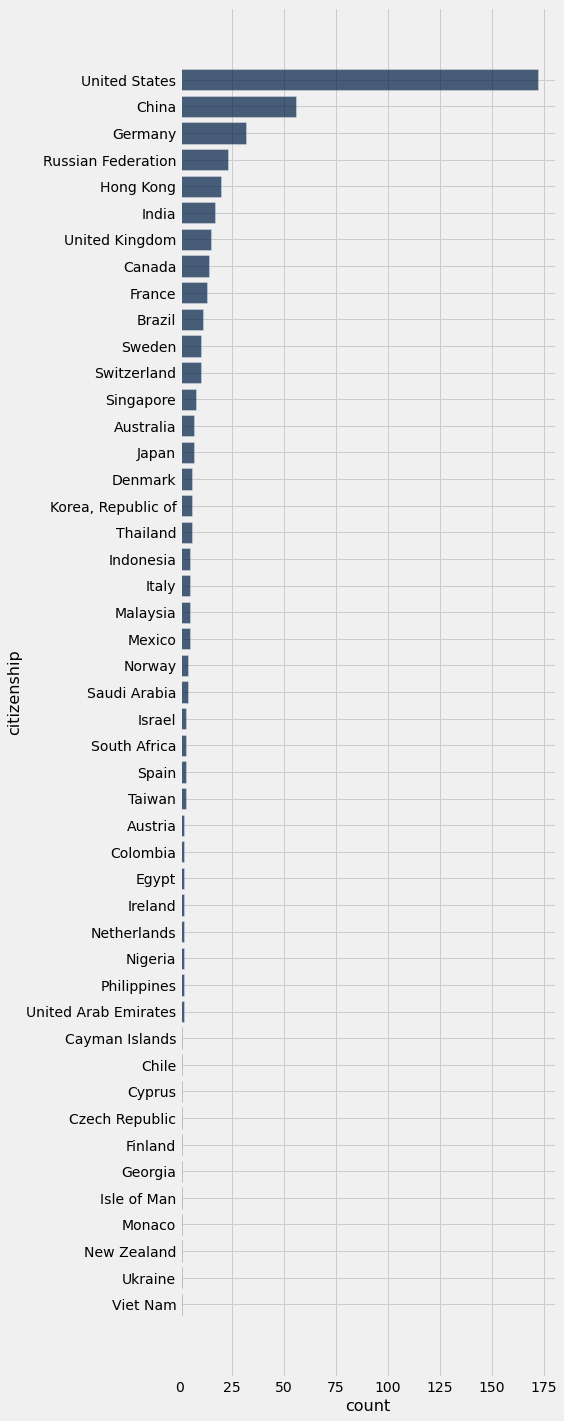

In [80]:
# Lets see where billions have citizen shape

# 1. Find distribution

#2. Graph it


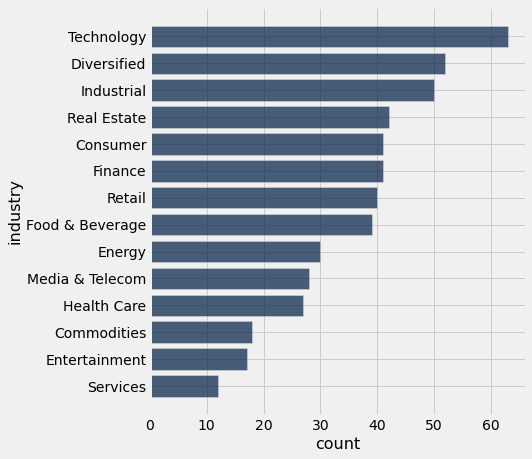

In [83]:
# Lets classify them based on their industry

# So have them classified by their inductry but how we do not know 
# if all the tech billionaires are in the US or Japan! 

# To understand where billionares are and how they are grouped in 
# their country we will need to classify on two variables 

In [5]:
# Lets make a pivot based on the industry and citizenship


citizenship,Commodities,Consumer,Diversified,Energy,Entertainment,Finance,Food & Beverage,Health Care,Industrial,Media & Telecom,Real Estate,Retail,Services,Technology
Australia,2,0,0,0,0,0,0,0,1,0,2,0,0,2
Austria,0,0,0,0,1,0,1,0,0,0,0,0,0,0
Brazil,1,0,0,0,0,5,3,0,1,0,0,0,0,1
Canada,1,0,0,1,0,0,1,0,0,7,0,3,0,1
Cayman Islands,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Chile,1,0,0,0,0,0,0,0,0,0,0,0,0,0
China,1,6,2,3,0,1,5,6,4,0,7,2,4,15
Colombia,0,0,0,0,0,1,1,0,0,0,0,0,0,0
Cyprus,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Czech Republic,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# It would be better to change citizenship to contentient
#Since there are more then o100 countries and only 7 continets



Continent,Country
Africa,Algeria
Africa,Angola
Africa,Benin
Africa,Botswana
Africa,Burkina
Africa,Burundi
Africa,Cameroon
Africa,Cape Verde
Africa,Central African Republic
Africa,Chad


In [8]:
# Use Join to combine billionares and countries in their 
# intersecting column



citizenship,name,net worth,industry,Continent
Australia,Gina Rinehart,19984845036,Commodities,Oceania
Australia,Andrew Forrest,10221458789,Commodities,Oceania
Australia,Harry Triguboff,9467000000,Real Estate,Oceania
Australia,Scott Farquhar,9335988154,Technology,Oceania
Australia,Mike Cannon-Brookes,9335988154,Technology,Oceania
Australia,Frank Lowy,6655432824,Real Estate,Oceania
Australia,Anthony Pratt,6566000000,Industrial,Oceania
Austria,Dietrich Mateschitz,12251315379,Food & Beverage,Europe
Austria,Johann Graf,6509183360,Entertainment,Europe
Brazil,Jorge Paulo Lemann,23056345424,Food & Beverage,South America


In [9]:
# Now Lets make a pivot on industry and continent



Continent,Commodities,Consumer,Diversified,Energy,Entertainment,Finance,Food & Beverage,Health Care,Industrial,Media & Telecom,Real Estate,Retail,Services,Technology
Africa,0,0,2,0,0,0,1,0,2,2,0,0,0,0
Asia,7,10,27,12,4,4,11,11,21,3,23,8,6,21
Europe,1,17,13,1,4,1,9,10,21,4,5,15,4,6
North America,6,14,10,17,9,29,14,6,4,19,12,17,2,33
Oceania,2,0,0,0,0,1,0,0,1,0,2,0,0,2
South America,2,0,0,0,0,6,4,0,1,0,0,0,0,1


In [87]:
# Just run this table 
ceo=Table().read_table('ceo.csv')
ceo

company,ceo,party,amount
3M Co,Bob Ulrich,200,8500
3M Co,Linda Alvarado,100,11244.6
3M Co,Robert Ulrich,200,591450
AES Corporation,Andres Gluski,100,6000
AES Corporation,Charles Rossotti,100,2500
AES Corporation,Charles Rossotti,200,1000
AES Corporation,John Koskinen,100,19000
AES Corporation,Kristina Johnson,100,28480
AES Corporation,Philip Lader,100,2500
AES Corporation,Philip Odeen,100,750


company,ceo,party,amount
Hewlett-Packard Co,Margaret Whitman,200,1.25273e+08
Caterpillar Inc,Jon Huntsman,200,1.27686e+07
Las Vegas Sands,Sheldon Adelson,200,6.20425e+06
Las Vegas Sands,Sheldon g Adelson,200,5e+06
Visteon,Harry Wilson,200,4.0304e+06
Yahoo! Inc,Daniel Loeb,200,2.51255e+06
YRC Worldwide Inc,Matthew Doheny,200,1.47332e+06
Charles Schwab Corp,Charles Schwab,200,1.2364e+06
DTE Energy,James Nicholson,200,986850
Limited Brance,Leslie Wexner,200,942800


company,ceo,party,amount
Bristol-Myers Squibb Company,Robert Williams,100,9
Amgen Inc,Gil Omenn,100,10
Bristol-Myers Squibb Company,Michael Grobstein,100,10
Caterpillar Inc,Leon Patten,100,10
Caseys General Stores,Richard Wilkey,100,23
AK Steel,William Gerber,200,25
Hollyfrontier Corporation,Matthews Clifton,100,25
Nordstrom Inc,Alison Winter,100,25
Calpine,Rob Mosbacher,100,35
CF Industries Holdings,John Johnson,100,40


In [91]:
# Lets Join billionaires and ceos at their common column name and ceo


name,citizenship,net worth,industry,Continent,company,party,amount
Barry Diller,United States,5479965153,Technology,North America,Coca-Cola Co,100,107500
Carl Icahn,United States,20515698449,Diversified,North America,CVR Energy,100,3000
Carl Icahn,United States,20515698449,Diversified,North America,CVR Energy,200,225900
Charles Dolan,United States,5387774353,Media & Telecom,North America,Cablevision,100,39400
Charles Dolan,United States,5387774353,Media & Telecom,North America,Cablevision,200,107000
Charles Johnson,United States,4587892463,Finance,North America,Franklin Resources,200,858000
Charles Koch,United States,61046822719,Industrial,North America,Assurant,100,1500
Charles Koch,United States,61046822719,Industrial,North America,Assurant,200,25400
Charles Schwab,United States,9063879795,Finance,North America,Charles Schwab Corp,100,1800
Charles Schwab,United States,9063879795,Finance,North America,Charles Schwab Corp,200,1.2364e+06


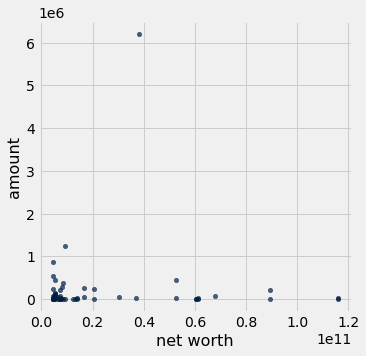

In [96]:
# Is there a relationship between worth and donations? 



In [94]:
# Finally lets find their dontation as a percentahe of their net worth



name,citizenship,net worth,industry,Continent,company,party,amount,Contribution%
Sheldon Adelson,United States,38008857087,Entertainment,North America,Las Vegas Sands,200,6.20425e+06,0.02%
Charles Schwab,United States,9063879795,Finance,North America,Charles Schwab Corp,200,1.2364e+06,0.01%
Charles Johnson,United States,4587892463,Finance,North America,Franklin Resources,200,858000,0.02%
Kelcy Warren,United States,4595072119,Energy,North America,Energy Transfer,200,529886,0.01%
Jim Walton,United States,52493506006,Retail,North America,Wal-Mart Stores Inc,200,444700,0.00%
Ray Hunt,United States,5421192714,Energy,North America,PepsiCo Inc,200,442364,0.01%
Richard Kinder,United States,8398076785,Energy,North America,Kinder Morgan,200,368000,0.00%
John Malone,United States,8069296402,Media & Telecom,North America,Liberty Global,200,280050,0.00%
Eric Schmidt,United States,16579148665,Technology,North America,google,100,257300,0.00%
Reed Hastings,United States,4569628489,Technology,North America,Facebook,100,241700,0.01%
